# Module 4: Assignment
## Aaron Hum
### Stephanie Moyerman, PhD
#### LSC 541: Statistics for Biological Data Science I
##### 2024-07-23

In [ ]:
# read in data
data <- read.table('data1_LSC598.txt', header = T)

# omit null values
data <- na.omit(data)

data

,age_month,gender,vitD_level,group
,<int>,<chr>,<dbl>,<int>
1,60,F,47.5,1
2,50,M,39.0,1
3,35,F,13.6,1
4,50,F,16.7,1
5,61,F,32.7,0
6,55,F,23.2,0
7,54,F,36.4,0
8,60,F,38.1,1
9,47,F,28.2,1


In [ ]:
# 1. Perform a linear regression to examine the relationship between age (x) and vitamin D level (y).
# Linear regression for all participants
fit_all <- lm(vitD_level ~ age_month, data = data)

# Summary of the regression model
summary(fit_all)


Call:
lm(formula = vitD_level ~ age_month, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.862 -10.545  -1.856   9.944  50.538 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.9566     8.0858   3.705 0.000378 ***
age_month     0.1176     0.1549   0.760 0.449622    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.61 on 84 degrees of freedom
Multiple R-squared:  0.006822,	Adjusted R-squared:  -0.005001 
F-statistic: 0.577 on 1 and 84 DF,  p-value: 0.4496


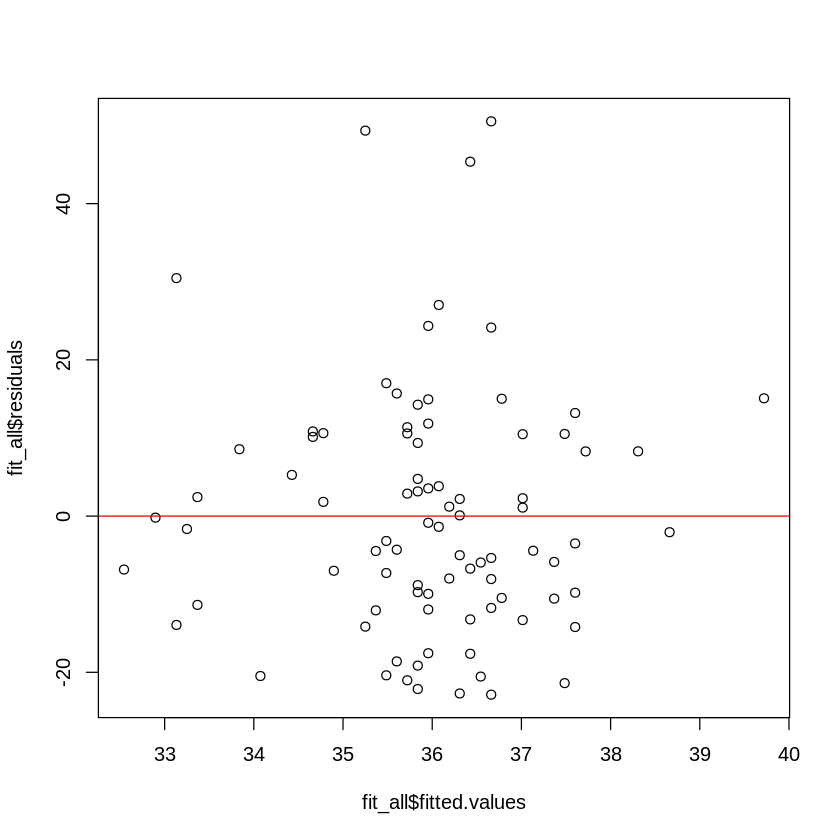

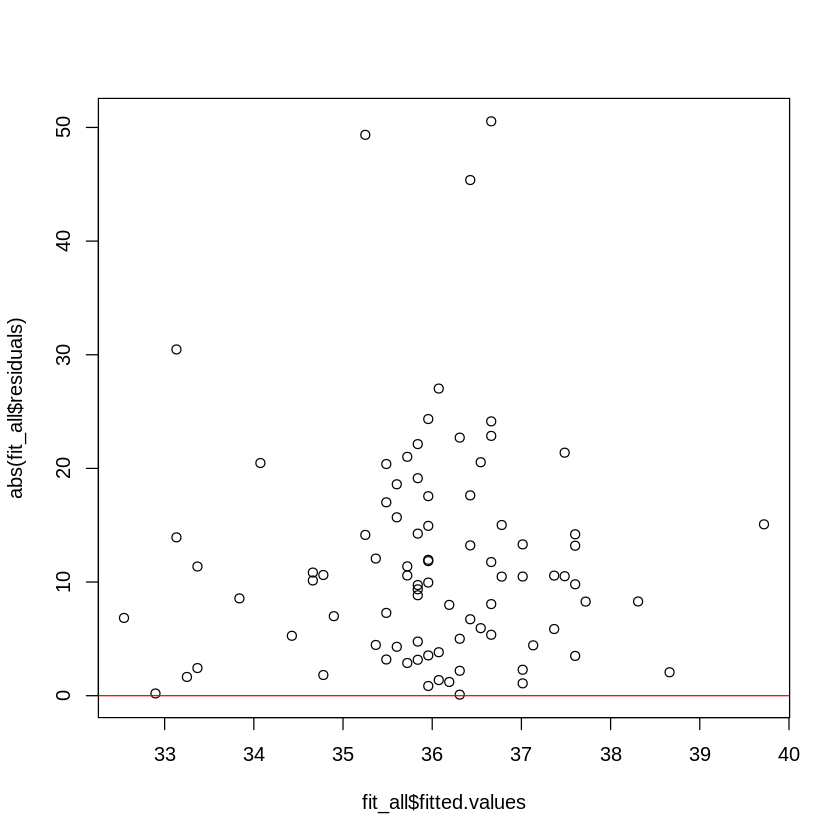

In [ ]:
# 1a. check the assumptions for linear regression.
# Assumption 1: Linearity
plot(fit_all$fitted.values, fit_all$residuals)
abline(h = 0, col = "red")  # Adding a horizontal line at y = 0 for reference
# Assumption 2: Homoscedasticity
plot(fit_all$fitted.values, abs(fit_all$residuals))
abline(h = 0, col = "red")  # Adding a horizontal line at y = 0 for reference

### Assumptions Check:
#### Linearity:
The plot of residuals vs. fitted values shows no clear pattern, indicating that the assumption of linearity is reasonably met.

#### Homoscedasticity:
The plot of absolute residuals vs. fitted values shows a random scatter, indicating that the assumption of homoscedasticity is reasonably met.

In [ ]:
# 1b. report the regression coefficients and their p-values. Interpret your results.
coefficients <- coef(fit_all)
p_values <- summary(fit_all)$coefficients[, 4]

coefficients_and_pvalues <- data.frame(
  Coefficients = coefficients,
  P_values = p_values
)

coefficients_and_pvalues


,Coefficients,P_values
,<dbl>,<dbl>
(Intercept),29.9565692,0.0003778194
age_month,0.1176309,0.4496216390


### Interpretation
The intercept (29.96) is significant with a p-value < 0.001.


The slope for age_month (0.118) is not significant with a p-value > 0.05, indicating that age does not have a significant linear relationship with vitamin D levels in the overall sample.

In [ ]:
# 2. healthy participants only

# subset data for healthy participants
healthy_data <- subset(data, group == 0)

# linear regression for healthy participants
fit_healthy <- lm(vitD_level ~ age_month, data = healthy_data)

# summary of the regression model for healthy participants
summary(fit_healthy)


Call:
lm(formula = vitD_level ~ age_month, data = healthy_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.965 -11.744  -2.705   9.441  49.056 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 34.24925   17.98735   1.904   0.0657 .
age_month    0.06832    0.33792   0.202   0.8410  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.38 on 33 degrees of freedom
Multiple R-squared:  0.001237,	Adjusted R-squared:  -0.02903 
F-statistic: 0.04088 on 1 and 33 DF,  p-value: 0.841


### Interpretation

The intercept (34.25) is not significant with a p-value > 0.05.

The slope for age_month (0.068) is not significant with a p-value > 0.05, indicating that age does not have a significant linear relationship with vitamin D levels among healthy participants.

In [ ]:
#3 autism patients only

# subset data for autism patients
autism_data <- subset(data, group == 1)

# linear regression for autism patients
fit_autism <- lm(vitD_level ~ age_month, data = autism_data)

# summary of the regression model for autism patients
summary(fit_autism)



Call:
lm(formula = vitD_level ~ age_month, data = autism_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.679  -9.768  -0.525   7.706  46.552 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  28.8873     8.6934   3.323  0.00169 **
age_month     0.1156     0.1688   0.685  0.49649   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.51 on 49 degrees of freedom
Multiple R-squared:  0.009489,	Adjusted R-squared:  -0.01073 
F-statistic: 0.4694 on 1 and 49 DF,  p-value: 0.4965


### Interpretation
The intercept (28.89) is significant with a p-value < 0.01.

The slope for age_month (0.116) is not significant with a p-value > 0.05, indicating that age does not have a significant linear relationship with vitamin D levels among autism patients.



## Compare Results from Step 2 and Step 3
For both healthy participants and autism patients, the slope of the regression (age_month) is not significant, suggesting no significant linear relationship between age and vitamin D levels in either group.

The intercept is significant for autism patients but not for healthy participants. This indicates a difference in the baseline levels of vitamin D between the two groups.

Overall, age does not appear to be a significant predictor of vitamin D levels in this dataset.

